In [2]:
!pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport #for EDA
import numpy as np
import seaborn as sns
from scipy.stats import ttest_rel

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10,10)

In [3]:
df = pd.read_csv(r'C:\Users\agogs\OneDrive\Documents\Data Analysis - Files\Portfolio Projects\People Analytics\HR Data for Analytics.csv')

# DATA WRANGLING

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#checking missing values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
#Confirming accuracy of datatype in each column
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [117]:
#Row and column #
df.shape

(14999, 10)

In [6]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
#Correcting datatypes
Categorical_variables = ['Work_accident','left','promotion_last_5years','salary','dept']

for i in Categorical_variables:
    df[i] = df[i].astype('category')

In [8]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.0,14999.0,14999.0,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,10,3
top,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,sales,low
freq,NaN,NaN,NaN,NaN,NaN,12830.0,11428.0,14680.0,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,NaN,NaN,NaN,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,NaN,NaN,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,NaN,NaN,NaN,NaN,NaN


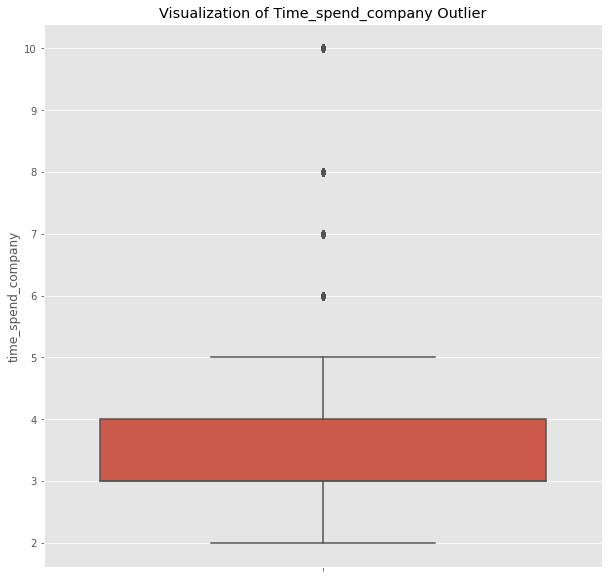

In [9]:
#After examining all fields for outliers, an outlier is found in time_spend_company with third quartile at 4 
#and max value of 10

#plotting box and whisker chart for better visualization of the time_spend_company field

sns.boxplot(y = df['time_spend_company']).set(title = 'Visualization of Time_spend_company Outlier')
plt.show()


#We'll need to normalize the time_spend_company field

In [10]:
#function to determine outliers in field

def find_boundaries (df, variables):
    #getting the interquartile range
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5* IQR
    upper_boundary = Q3 + 1.5* IQR
    
    return lower_boundary, upper_boundary
    

In [11]:
lower_range, upper_range = find_boundaries(df,'time_spend_company')

print ('Upper limit for time_spend_company is', upper_range)
print ('Lower limit for time_spend_company is', lower_range)

Upper limit for time_spend_company is 5.5
Lower limit for time_spend_company is 1.5


In [12]:
#Though outliers might be accurate, I will replace them with the upper and lower range to normalize the data
df['time_spend_company'] = np.where (df['time_spend_company'] > upper_range, upper_range,
                                     np.where(df['time_spend_company'] < lower_range, lower_range, df['time_spend_company']))

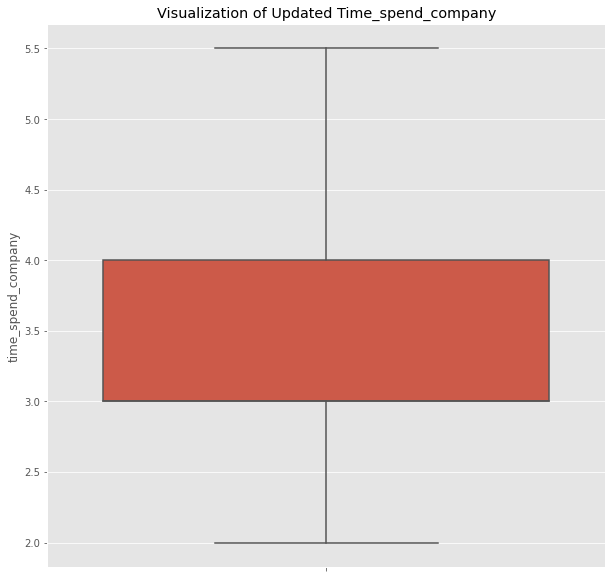

In [13]:
#Adjusted field
sns.boxplot(y = df['time_spend_company']).set(title = 'Visualization of Updated Time_spend_company')
plt.show()

# Full Exploratory Data Analysis

In [31]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [32]:
#Unique values per column
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         5
Work_accident              2
left                       2
promotion_last_5years      2
dept                      10
salary                     3
dtype: int64

DISTRIBUTION OF VARIABLES

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

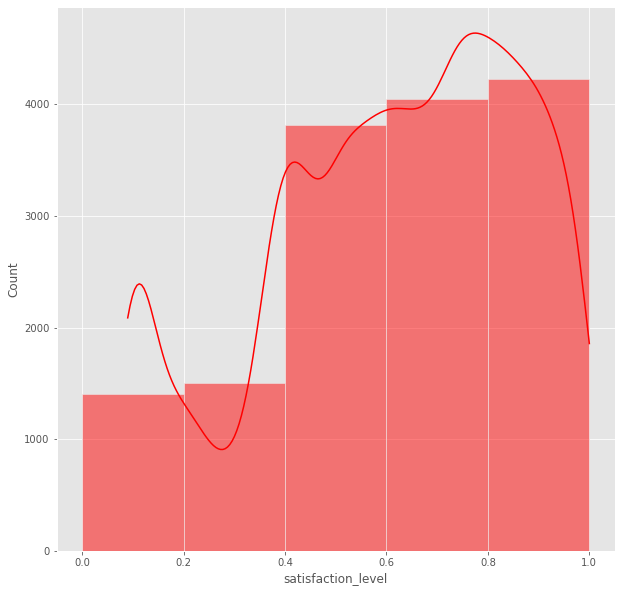

In [103]:
sns.histplot(data = df, x = 'satisfaction_level', kde = True, binwidth=0.2, binrange=(0,1), color = 'red')

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

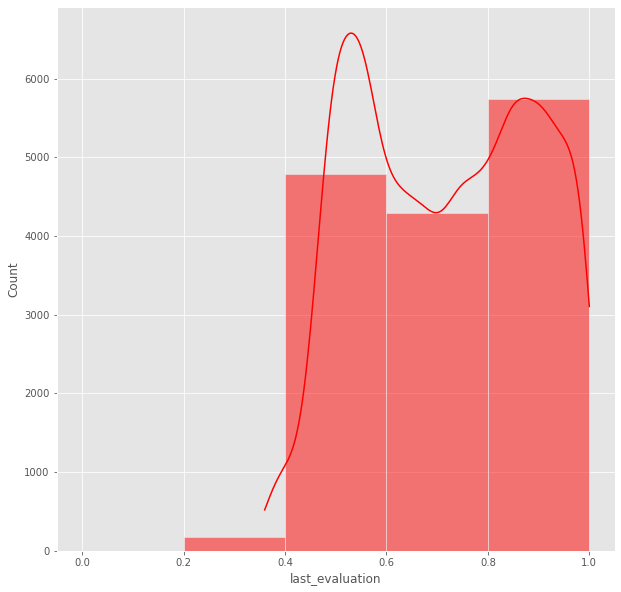

In [104]:
sns.histplot(data = df, x = 'last_evaluation', kde = True, binwidth=0.2, binrange=(0,1), color = 'red')

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

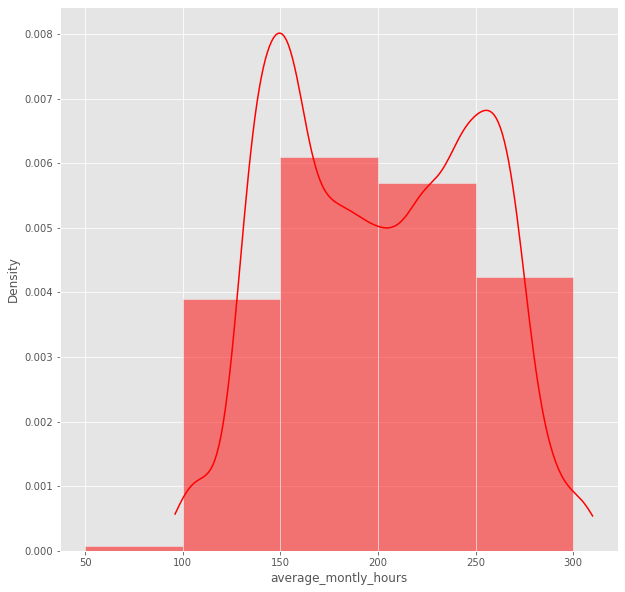

In [105]:
sns.histplot(data = df, x = 'average_montly_hours', kde = True, binwidth=50, binrange=(50,300), stat = 'density', color = 'red')

<AxesSubplot:xlabel='number_project', ylabel='Probability'>

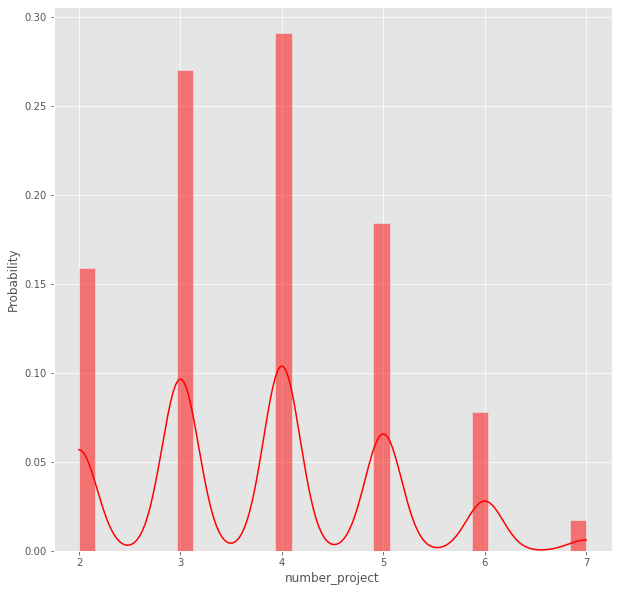

In [106]:
sns.histplot(data = df, x = 'number_project', kde = True, stat = 'probability', color = 'red')

<AxesSubplot:xlabel='time_spend_company', ylabel='Probability'>

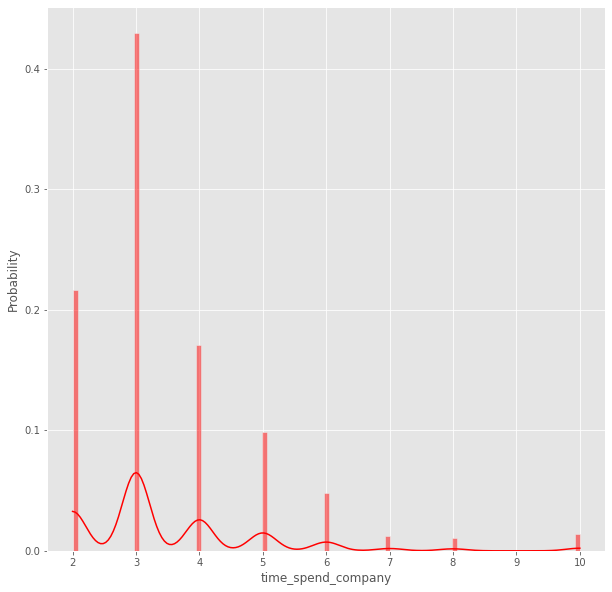

In [107]:
sns.histplot(data = df, x = 'time_spend_company', kde = True, stat = 'probability', color = 'red')

<AxesSubplot:xlabel='Work_accident', ylabel='Probability'>

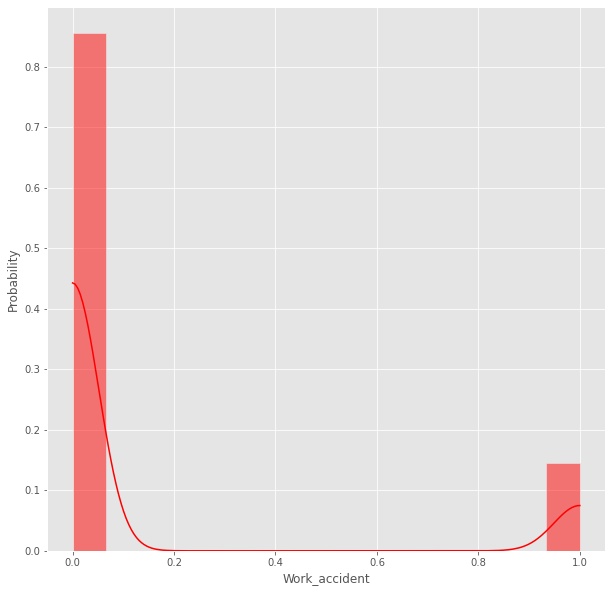

In [108]:
sns.histplot(data = df, x = 'Work_accident', kde = True, stat = 'probability', color = 'red')

<AxesSubplot:xlabel='left', ylabel='Probability'>

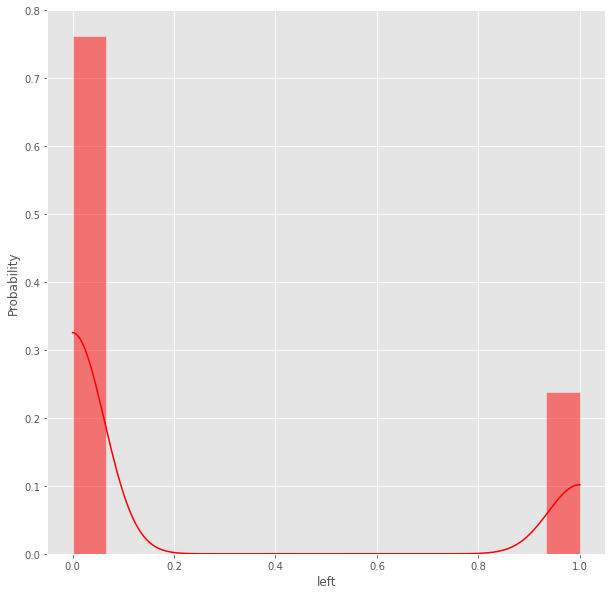

In [109]:
sns.histplot(data = df, x = 'left', kde = True, stat = 'probability', color = 'red')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='Probability'>

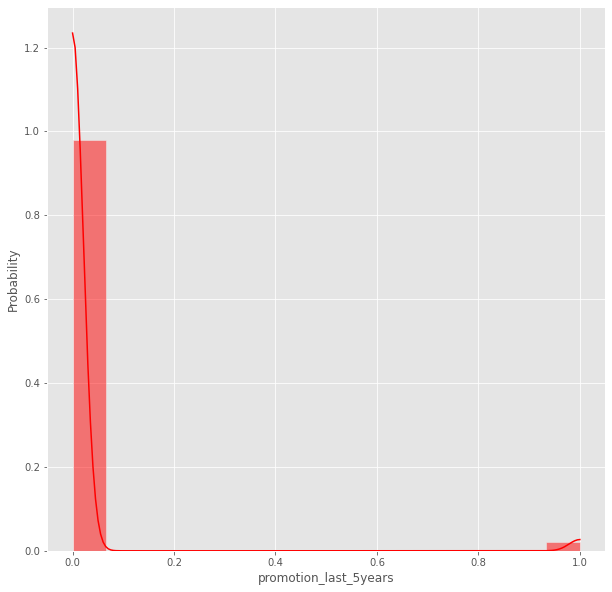

In [114]:
sns.histplot(data = df, x = 'promotion_last_5years', kde = True, stat = 'probability', color = 'red')

<AxesSubplot:xlabel='dept', ylabel='Count'>

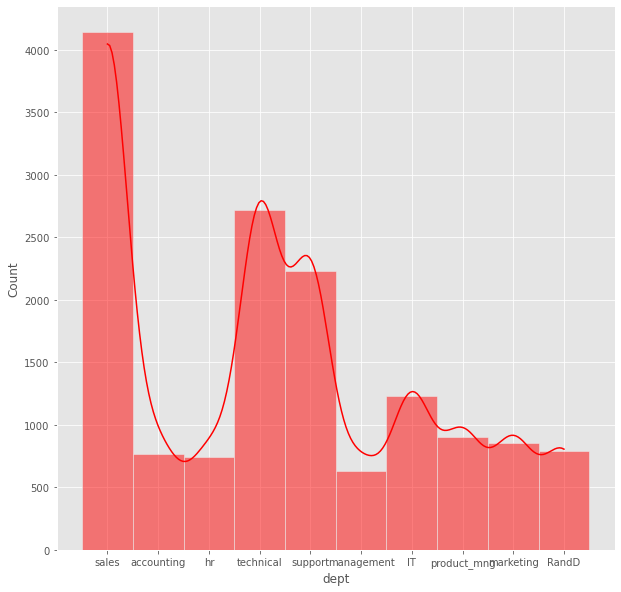

In [111]:
sns.histplot(data = df, x = 'dept', kde = True, color = 'red')

<AxesSubplot:xlabel='salary', ylabel='Probability'>

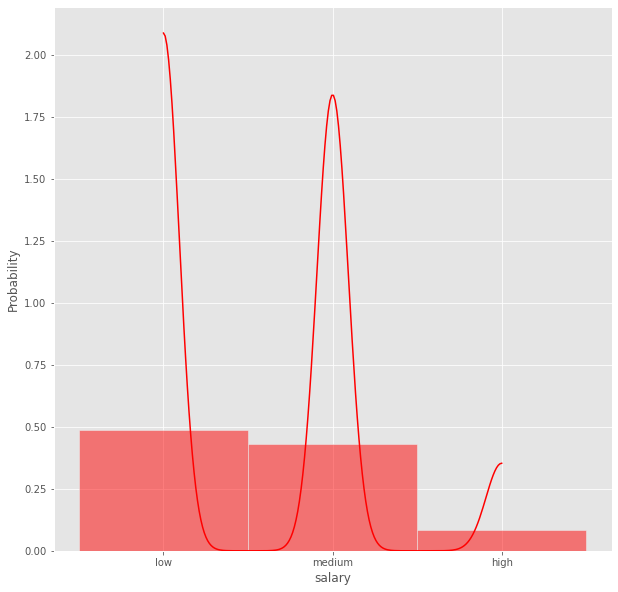

In [112]:
sns.histplot(data = df, x = 'salary', kde = True, stat = 'probability', color = 'red')

CORRELATION OF ALL VARIABLES

In [45]:
#Assigning random numeric values to categorical variables

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'category'):
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,7,1
1,0.80,0.86,5,262,5.5,0,1,0,7,2
2,0.11,0.88,7,272,4.0,0,1,0,7,2
3,0.72,0.87,5,223,5.0,0,1,0,7,1
4,0.37,0.52,2,159,3.0,0,1,0,7,1


<AxesSubplot:>

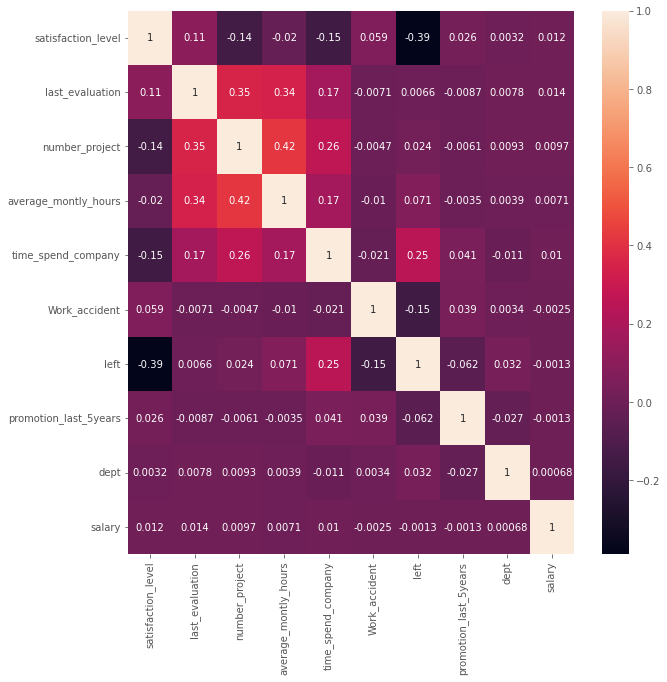

In [46]:
correlation = df_numerized.corr()
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

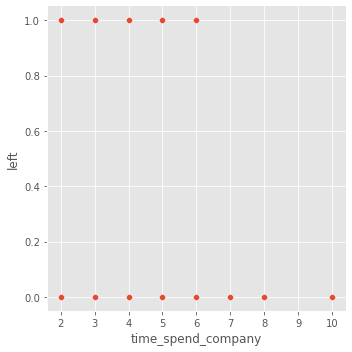

In [118]:
#clear relationship between variables with high correlation
sns.relplot(x='time_spend_company', y='left', data=df)

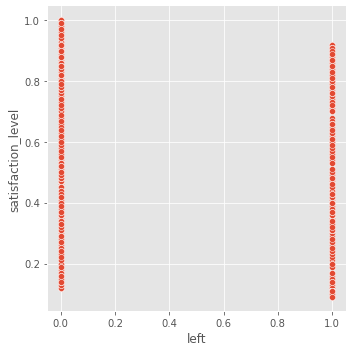

In [119]:
sns.relplot(x='left', y='satisfaction_level',data=df)

In [19]:
satisfaction_level_pvalue = ttest_rel(df.satisfaction_level, df.left)

satisfaction_level_pvalue




Ttest_relResult(statistic=80.44678339508334, pvalue=0.0)

In [14]:
time_spend_company_pvalue = ttest_rel(df.time_spend_company, df.left)

time_spend_company_pvalue

Ttest_relResult(statistic=273.36642620395213, pvalue=0.0)

# Conclusion

The level of correlation of time employees spend in the company and employee satisfaction level with attrition is quite low. I would consider sourcing more data and exploring other factors e.g employee managers, department, training hours, performance ratings, etc